In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
# mostly using pandas

In [4]:
# Read the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
# Create matrix X and Y as numpy arrays 
# if we dont use .values, it will remain a dataframe
# Assumption: Y is always the last column
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, -1].values
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


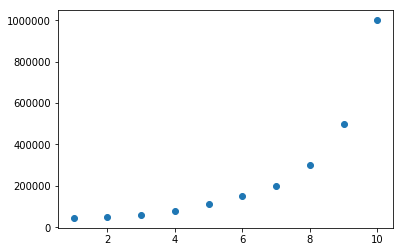

In [10]:
# Plot the salary vs level
plt.scatter(x = X, y = Y)
plt.show()

In [14]:
# Linear regression - for checking 
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Polynmoial regression
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 4)
X_poly = polynomial_regressor.fit_transform(X)

In [31]:
# Check the conversion of X into polynomial
print(X)
print(X_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00]
 [  1.00000000e+00   2.00000000e+00   4.00000000e+00   8.00000000e+00
    1.60000000e+01]
 [  1.00000000e+00   3.00000000e+00   9.00000000e+00   2.70000000e+01
    8.10000000e+01]
 [  1.00000000e+00   4.00000000e+00   1.60000000e+01   6.40000000e+01
    2.56000000e+02]
 [  1.00000000e+00   5.00000000e+00   2.50000000e+01   1.25000000e+02
    6.25000000e+02]
 [  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02
    1.29600000e+03]
 [  1.00000000e+00   7.00000000e+00   4.90000000e+01   3.43000000e+02
    2.40100000e+03]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02
    4.09600000e+03]
 [  1.00000000e+00   9.00000000e+00   8.10000000e+01   7.29000000e+02
    6.56100000e+03]
 [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
    1.00000000e+04]]


In [32]:
# Create the linear regression on X_poly
linear_regressor_poly = LinearRegression()
linear_regressor_poly.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

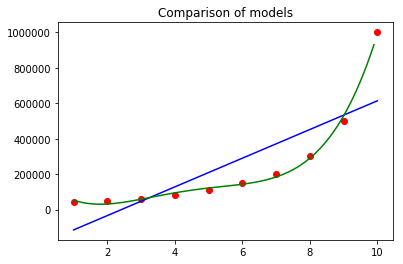

In [35]:
# Visualize the results and compare
# Red - real data; Blue - linear reg; Green - Polynomial
X_grid = np.arange(min(X), max(X) , 0.1)
X_grid = X_grid.reshape((len(X_grid), 1)) # This is created for smooth graph
plt.scatter(x = X, y = Y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.plot(X_grid, linear_regressor_poly.predict(polynomial_regressor.fit_transform(X_grid)), color = 'green')
plt.title('Comparison of models')
plt.show()